# Deep learning and AI methods
## Session 3: Feedforward Neural Network and cloth images
* Instructor: [Krzysztof Podgorski](https://krys.neocities.org),  [Statistics, Lund University, LUSEM](https://www.stat.lu.se/)
* For more information visit the [CANVAS class website](https://canvas.education.lu.se/courses/1712).

In this session we learn some basic about *TensorFlow* and *Keras* by solving an example of immage recognition problem. Note that the code is not necessarily complete so it may not be enough just to run the code cells and somme your own programing may be needed on some occasions. 

## Project 1 Building neural networks for classification

This project trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [2]:
# Just something I need to set up to make fitting work without kernel dying
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images_raw, train_labels), (test_images_raw, test_labels) = fashion_mnist.load_data()

The next part is a repetition from the previous lab to obtain the split of the data for cross-validation and pre-process the data.

In [4]:
# Scaling the data
train_images = train_images_raw / 255.0
test_images = test_images_raw / 255.0

# Shuffle and rearrange data
perm = np.random.permutation(60000)
rearr = perm.reshape(10, 6000)

# Create cross validation set
CV_images = train_images[rearr]
CV_labels = train_labels[rearr]
print(len(CV_images[0]))

# commenting this out so as not to scale once more
# CV_images = CV_images / 255.0

6000


In [5]:
%%time

# Prepare cross validation set 1
CVin = [list(rearr[0]), list(rearr[1])]
for k in range(8):
    CVin[1] = CVin[1] + list(rearr[k+2]%10)
CVin = [CVin]

# Same for the rest of the sets
for i in range(9):
    C = [list(rearr[i+1]), list(rearr[(i+2)%10])]
    for k in range(8):
        C[1] = C[1] + list(rearr[(i+3+k)%10])
    CVin = CVin + [C]

CPU times: user 59.7 ms, sys: 14.3 ms, total: 74.1 ms
Wall time: 91.2 ms


### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

#### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [56]:
# Set up the model using two hidden layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [57]:
# Set up training 'instructions' for the model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

### Task 1: Train the model

Check the basic info about the model using `model.summary()`. How many parameters is there in the model? How could you count without using this function? Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method — it is so called because it "fits" the model to the training data.

Please, perform fitting the model and analyze its performance. Compare the reported accuracy on the training data to the one on the testing data set. For the latter, use `model.evaluate(test_images,  test_labels, verbose=2)`. Note that the algorithms also give the loss function values. 

Compare the results with the ones obtained by the MGaussianLE method from the previous lab. 

In [58]:
# Check model setup
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_55 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_166 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_167 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
%%time

# Fit the model
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 247us/sample - loss: 0.4920 - acc: 0.8253
Epoch 2/10
60000/60000 [==============================] - 15s 249us/sample - loss: 0.3693 - acc: 0.8662
Epoch 3/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.3337 - acc: 0.8778
Epoch 4/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.3085 - acc: 0.8873
Epoch 5/10
60000/60000 [==============================] - 17s 284us/sample - loss: 0.2897 - acc: 0.8934
Epoch 6/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.2768 - acc: 0.8971
Epoch 7/10
60000/60000 [==============================] - 17s 279us/sample - loss: 0.2634 - acc: 0.9026
Epoch 8/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.2544 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.2443 - acc: 0.9095
Epoch 10/10
60000/60000 [================

#### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [10]:
# Evaluate test data
test_loss_, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)
print('\nError rate:', 1 - test_acc)

10000/10000 - 1s - loss: 0.3330 - acc: 0.8841

Test accuracy: 0.8841

Error rate: 0.11589998006820679


*Comment*: To start with, we can note that it's already performing quite a bit better then the ML classifier we built in lab 2 (which had an error rate around 30 %).

### Task 2:

Consider five other designs of neural networks that you would test on the above data set. In your design change the number of layers and the number of neuron per layer but preserve the total number of neurons.


#### Solution
I'll now build five more models, in which I'll slightly change some of the model settings. We can call this changing the model architecture, if we want to use big words. Summary of how I'll change the models:

* Model1: Add one extra 'relu' activaion hidden layer
* Model2: Add three extra 'relu' activation hidden layers and change their number of nodes to 32
* Model3: Change activation in hidden later in original model to sigmoid
* Model4: Add three layers with 'relu' and use different number of nodes per layer
* Model5: Change the number of nodes in the original model to only 64

Not that I'm not actually fitting them as that seems to be the next task.

In [94]:
# Model 1

def define_compile_model1(dim = 28):
    # Architecture
    model1 = keras.Sequential([
        keras.layers.Flatten(input_shape = (dim, dim)),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

    # Training settings
    model1.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])
    
    return model1
    
model1 = define_compile_model1()

In [106]:
# Model 2

def define_compile_model2(dim = 28):
    # Architechture
    model2 = keras.Sequential([
        keras.layers.Flatten(input_shape = (dim, dim)),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])
    
    # Training settings
    model2.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])
    return model2

model2 = define_compile_model2()

In [107]:
# Model 3

def define_compile_model3(dim = 28):
    # Architechture
    model3 = keras.Sequential([
        keras.layers.Flatten(input_shape = (dim, dim)),
        keras.layers.Dense(128, activation = 'sigmoid'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

    # Training settings
    model3.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])
    
    return model3

model3 = define_compile_model3()

In [108]:
# Model 4

def define_compile_model4(dim = 28):
    # Architechture
    model4 = keras.Sequential([
        keras.layers.Flatten(input_shape = (dim, dim)),
        keras.layers.Dense(392, activation = 'relu'),
        keras.layers.Dense(98, activation = 'relu'),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(20, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

    # Training settings
    model4.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])
    
    return model4

model4 = define_compile_model4()

In [109]:
# Model 5

def define_compile_model5(dim = 28):
    # Architechture
    model5 = keras.Sequential([
        keras.layers.Flatten(input_shape = (dim, dim)),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

    # Training settings
    model5.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model5

model5 = define_compile_model5()

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [140]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_55 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_166 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_167 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [141]:
model1.summary()

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_79 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_244 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_245 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_246 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [142]:
model2.summary()

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_89 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_272 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_273 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_274 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_275 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_276 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________

In [143]:
model3.summary()

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_90 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_277 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_278 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [144]:
model4.summary()

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_91 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_279 (Dense)            (None, 392)               307720    
_________________________________________________________________
dense_280 (Dense)            (None, 98)                38514     
_________________________________________________________________
dense_281 (Dense)            (None, 128)               12672     
_________________________________________________________________
dense_282 (Dense)            (None, 20)                2580      
_________________________________________________________________
dense_283 (Dense)            (None, 10)                210       
Total params: 361,696
Trainable params: 361,696
Non-trainable params: 0
_______________________________________________

In [145]:
model5.summary()

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_92 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_284 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_285 (Dense)            (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Task 3:

Use the 10 fold cross validation method to investigate the performance of the networks designed by you as well as the the one that was originally trained above (for the total of six networks). Select the one that based on the performed cross validation worked best. It can be computationally (and thus timewise) costly operation. Test the approach with smaller sizes to assess the time needed. You may reduce the size of the data if you see that your computers will not handle the task within reasonable time. 

In [22]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
         

In [27]:
# Cross validation on original model
test_loss_list = []
test_acc_list = []

for k in range(10):
    
    # Pick our training and test set needed for the CV procedure
    testCVim = train_images[CVin[k][0]]
    testCVlb = train_labels[CVin[k][0]]
    trainCVim = train_images[CVin[k][1]]
    trainCVlb = train_labels[CVin[k][1]]
    
    # Delete the old model
    del model 
    
    # Redefine model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28, 28)),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])
    
    # Recompile model
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    
    # Fit model
    model.fit(trainCVim, trainCVlb, epochs = 10)
    test_loss, test_acc = model.evaluate(testCVim, testCVlb, verbose = 0)
    
    # Record the results in our lists
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 255us/sample - loss: 0.0991 - acc: 0.9686
Epoch 2/10
54000/54000 [==============================] - 27s 499us/sample - loss: 0.0600 - acc: 0.9789
Epoch 3/10
54000/54000 [==============================] - 14s 250us/sample - loss: 0.0502 - acc: 0.9820
Epoch 4/10
54000/54000 [==============================] - 14s 259us/sample - loss: 0.0459 - acc: 0.9831
Epoch 5/10
54000/54000 [==============================] - 12s 218us/sample - loss: 0.0430 - acc: 0.9844
Epoch 6/10
54000/54000 [==============================] - 14s 250us/sample - loss: 0.0390 - acc: 0.9851
Epoch 7/10
54000/54000 [==============================] - 13s 242us/sample - loss: 0.0368 - acc: 0.9859
Epoch 8/10
54000/54000 [==============================] - 13s 238us/sample - loss: 0.0351 - acc: 0.9865
Epoch 9/10
54000/54000 [==============================] - 13s 247us/sample - loss: 0.0330 - acc: 0.9878
Epoch 10/10
54000/54000 [================

In [61]:
CV_accuracy_model = np.mean(test_acc_list)
print('Accuracy:', CV_accuracy_model)

Accuracy: 0.8856999


In [40]:
# Model1

test_loss_list_model1 = []
test_acc_list_model1 = []

for k in range(10):
    
    # Pick our training and test set needed for the CV procedure
    testCVim = train_images[CVin[k][0]]
    testCVlb = train_labels[CVin[k][0]]
    trainCVim = train_images[CVin[k][1]]
    trainCVlb = train_labels[CVin[k][1]]
    
    # Delete the old model
    del model1 
    
    # Redefine and recompile model
    model1 = define_compile_model1()
    
    # Fit model
    model1.fit(trainCVim, trainCVlb, epochs = 10)
    test_loss, test_acc = model1.evaluate(testCVim, testCVlb, verbose = 0)
    
    # Record the results in our lists
    test_loss_list_model1.append(test_loss)
    test_acc_list_model1.append(test_acc)

Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 22s 412us/sample - loss: 0.0963 - acc: 0.9675
Epoch 2/10
54000/54000 [==============================] - 13s 250us/sample - loss: 0.0600 - acc: 0.9781
Epoch 3/10
54000/54000 [==============================] - 12s 217us/sample - loss: 0.0519 - acc: 0.9806
Epoch 4/10
54000/54000 [==============================] - 12s 220us/sample - loss: 0.0465 - acc: 0.9826
Epoch 5/10
54000/54000 [==============================] - 15s 269us/sample - loss: 0.0437 - acc: 0.9837
Epoch 6/10
54000/54000 [==============================] - 16s 302us/sample - loss: 0.0402 - acc: 0.9847
Epoch 7/10
54000/54000 [==============================] - 13s 249us/sample - loss: 0.0380 - acc: 0.9858
Epoch 8/10
54000/54000 [==============================] - 12s 222us/sample - loss: 0.0353 - acc: 0.9864
Epoch 9/10
54000/54000 [==============================] - 13s 242us/sample - loss: 0.0338 - acc: 0.9872
Epoch 10/10
54000/54000 [================

Epoch 8/10
54000/54000 [==============================] - 12s 231us/sample - loss: 0.2542 - acc: 0.9044
Epoch 9/10
54000/54000 [==============================] - 13s 243us/sample - loss: 0.2416 - acc: 0.9090
Epoch 10/10
54000/54000 [==============================] - 13s 235us/sample - loss: 0.2371 - acc: 0.9100
Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 254us/sample - loss: 0.4867 - acc: 0.8250
Epoch 2/10
54000/54000 [==============================] - 13s 246us/sample - loss: 0.3639 - acc: 0.8674
Epoch 3/10
54000/54000 [==============================] - 14s 250us/sample - loss: 0.3300 - acc: 0.8780
Epoch 4/10
54000/54000 [==============================] - 13s 240us/sample - loss: 0.3085 - acc: 0.8853
Epoch 5/10
54000/54000 [==============================] - 13s 240us/sample - loss: 0.2902 - acc: 0.8922
Epoch 6/10
54000/54000 [==============================] - 13s 250us/sample - loss: 0.2750 - acc: 0.8972
Epoch 7/10
54000/54000 [================

In [62]:
CV_accuracy_model1 = np.mean(test_acc_list_model1)
print('Accuracy:', CV_accuracy_model1)

Accuracy: 0.8849667


In [42]:
# Model2

test_loss_list_model2 = []
test_acc_list_model2 = []

for k in range(10):
    
    # Pick our training and test set needed for the CV procedure
    testCVim = train_images[CVin[k][0]]
    testCVlb = train_labels[CVin[k][0]]
    trainCVim = train_images[CVin[k][1]]
    trainCVlb = train_labels[CVin[k][1]]
    
    # Delete the old model
    del model2 
    
    # Redefine and recompile model
    model2 = define_compile_model2()
    
    # Fit model
    model2.fit(trainCVim, trainCVlb, epochs = 10)
    test_loss, test_acc = model2.evaluate(testCVim, testCVlb, verbose = 0)
    
    # Record the results in our lists
    test_loss_list_model2.append(test_loss)
    test_acc_list_model2.append(test_acc)

Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 12s 222us/sample - loss: 0.1321 - acc: 0.9605
Epoch 2/10
54000/54000 [==============================] - 10s 192us/sample - loss: 0.0660 - acc: 0.9761
Epoch 3/10
54000/54000 [==============================] - 9s 173us/sample - loss: 0.0572 - acc: 0.9792
Epoch 4/10
54000/54000 [==============================] - 10s 184us/sample - loss: 0.0513 - acc: 0.9809
Epoch 5/10
54000/54000 [==============================] - 10s 179us/sample - loss: 0.0487 - acc: 0.9818
Epoch 6/10
54000/54000 [==============================] - 9s 173us/sample - loss: 0.0457 - acc: 0.9830
Epoch 7/10
54000/54000 [==============================] - 10s 185us/sample - loss: 0.0427 - acc: 0.9842
Epoch 8/10
54000/54000 [==============================] - 10s 187us/sample - loss: 0.0425 - acc: 0.9841
Epoch 9/10
54000/54000 [==============================] - 10s 190us/sample - loss: 0.0403 - acc: 0.9849
Epoch 10/10
54000/54000 [==================

In [63]:
CV_accuracy_model2 = np.mean(test_acc_list_model2)
print('Accuracy:', CV_accuracy_model2)

Accuracy: 0.8721167


In [46]:
# Model3

test_loss_list_model3 = []
test_acc_list_model3 = []

for k in range(10):
    
    # Pick our training and test set needed for the CV procedure
    testCVim = train_images[CVin[k][0]]
    testCVlb = train_labels[CVin[k][0]]
    trainCVim = train_images[CVin[k][1]]
    trainCVlb = train_labels[CVin[k][1]]
    
    # Delete the old model
    del model3 
    
    # Redefine model
    model3 = define_compile_model3()
    
    # Fit model
    model3.fit(trainCVim, trainCVlb, epochs = 10)
    test_loss, test_acc = model3.evaluate(testCVim, testCVlb, verbose = 0)
    
    # Record the results in our lists
    test_loss_list_model3.append(test_loss)
    test_acc_list_model3.append(test_acc)

Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 16s 299us/sample - loss: 0.1210 - acc: 0.9643
Epoch 2/10
54000/54000 [==============================] - 14s 266us/sample - loss: 0.0593 - acc: 0.9787
Epoch 3/10
54000/54000 [==============================] - 13s 243us/sample - loss: 0.0511 - acc: 0.9814
Epoch 4/10
54000/54000 [==============================] - 13s 239us/sample - loss: 0.0456 - acc: 0.9832
Epoch 5/10
54000/54000 [==============================] - 13s 237us/sample - loss: 0.0419 - acc: 0.9844
Epoch 6/10
54000/54000 [==============================] - 14s 266us/sample - loss: 0.0391 - acc: 0.9853
Epoch 7/10
54000/54000 [==============================] - 15s 271us/sample - loss: 0.0367 - acc: 0.9861
Epoch 8/10
54000/54000 [==============================] - 15s 273us/sample - loss: 0.0338 - acc: 0.9878
Epoch 9/10
54000/54000 [==============================] - 14s 261us/sample - loss: 0.0324 - acc: 0.9882
Epoch 10/10
54000/54000 [================

In [64]:
CV_accuracy_model3 = np.mean(test_acc_list_model3)
print('Accuracy:', CV_accuracy_model3)

Accuracy: 0.88514996


In [65]:
# Model4

test_loss_list_model4 = []
test_acc_list_model4 = []

for k in range(10):
    
    # Pick our training and test set needed for the CV procedure
    testCVim = train_images[CVin[k][0]]
    testCVlb = train_labels[CVin[k][0]]
    trainCVim = train_images[CVin[k][1]]
    trainCVlb = train_labels[CVin[k][1]]
    
    # Delete the old model
    del model4 
    
    # Redefine model
    model4 = define_compile_model4()
    
    # Fit model
    model4.fit(trainCVim, trainCVlb, epochs = 10)
    test_loss, test_acc = model4.evaluate(testCVim, testCVlb, verbose = 0)
    
    # Record the results in our lists
    test_loss_list_model4.append(test_loss)
    test_acc_list_model4.append(test_acc)

Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 45s 833us/sample - loss: 0.1072 - acc: 0.9646
Epoch 2/10
54000/54000 [==============================] - 32s 594us/sample - loss: 0.0646 - acc: 0.9764
Epoch 3/10
54000/54000 [==============================] - 47s 862us/sample - loss: 0.0573 - acc: 0.9790
Epoch 4/10
54000/54000 [==============================] - 32s 592us/sample - loss: 0.0520 - acc: 0.9810
Epoch 5/10
54000/54000 [==============================] - 33s 607us/sample - loss: 0.0477 - acc: 0.9825
Epoch 6/10
54000/54000 [==============================] - 32s 597us/sample - loss: 0.0464 - acc: 0.9832
Epoch 7/10
54000/54000 [==============================] - 39s 727us/sample - loss: 0.0414 - acc: 0.9842
Epoch 8/10
54000/54000 [==============================] - 31s 579us/sample - loss: 0.0415 - acc: 0.9847 - loss
Epoch 9/10
54000/54000 [==============================] - 46s 861us/sample - loss: 0.0379 - acc: 0.9858
Epoch 10/10
54000/54000 [=========

In [66]:
CV_accuracy_model4 = np.mean(test_acc_list_model4)
print('Accuracy:', CV_accuracy_model4)

Accuracy: 0.88386667


In [69]:
# Model5

test_loss_list_model5 = []
test_acc_list_model5 = []

for k in range(10):
    
    # Pick our training and test set needed for the CV procedure
    testCVim = train_images[CVin[k][0]]
    testCVlb = train_labels[CVin[k][0]]
    trainCVim = train_images[CVin[k][1]]
    trainCVlb = train_labels[CVin[k][1]]
    
    # Delete the old model
    del model5 
    
    # Redefine model
    model5 = define_compile_model5()
    
    # Fit model
    model5.fit(trainCVim, trainCVlb, epochs = 10)
    test_loss, test_acc = model5.evaluate(testCVim, testCVlb, verbose = 0)
    
    # Record the results in our lists
    test_loss_list_model5.append(test_loss)
    test_acc_list_model5.append(test_acc)

Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 16s 305us/sample - loss: 0.1073 - acc: 0.9666
Epoch 2/10
54000/54000 [==============================] - 15s 282us/sample - loss: 0.0616 - acc: 0.9786
Epoch 3/10
54000/54000 [==============================] - 15s 276us/sample - loss: 0.0541 - acc: 0.9811
Epoch 4/10
54000/54000 [==============================] - 17s 314us/sample - loss: 0.0483 - acc: 0.9826
Epoch 5/10
54000/54000 [==============================] - 15s 273us/sample - loss: 0.0446 - acc: 0.9837
Epoch 6/10
54000/54000 [==============================] - 18s 336us/sample - loss: 0.0419 - acc: 0.9849
Epoch 7/10
54000/54000 [==============================] - 12s 225us/sample - loss: 0.0387 - acc: 0.9852
Epoch 8/10
54000/54000 [==============================] - 12s 217us/sample - loss: 0.0362 - acc: 0.9863
Epoch 9/10
54000/54000 [==============================] - 12s 214us/sample - loss: 0.0343 - acc: 0.9869
Epoch 10/10
54000/54000 [================

Epoch 8/10
54000/54000 [==============================] - 11s 213us/sample - loss: 0.2846 - acc: 0.8958 - loss: 0.2845 - acc: 0.895
Epoch 9/10
54000/54000 [==============================] - 12s 216us/sample - loss: 0.2752 - acc: 0.8985
Epoch 10/10
54000/54000 [==============================] - 14s 256us/sample - loss: 0.2639 - acc: 0.9016
Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 20s 365us/sample - loss: 0.5283 - acc: 0.8153
Epoch 2/10
54000/54000 [==============================] - 16s 293us/sample - loss: 0.4066 - acc: 0.8560
Epoch 3/10
54000/54000 [==============================] - 12s 227us/sample - loss: 0.3674 - acc: 0.8681
Epoch 4/10
54000/54000 [==============================] - 12s 216us/sample - loss: 0.3406 - acc: 0.8760
Epoch 5/10
54000/54000 [==============================] - 12s 228us/sample - loss: 0.3223 - acc: 0.8826
Epoch 6/10
54000/54000 [==============================] - 12s 224us/sample - loss: 0.3078 - acc: 0.8885
Epoch 7/10
5

In [70]:
CV_accuracy_model5 = np.mean(test_acc_list_model5)
print('Accuracy:', CV_accuracy_model5)

Accuracy: 0.8797167


#### Comparison
Next I'll check which of the models perform best. It can also be interesting to plot the accuracy against number of hidden layers and number of parameters, just to see if there seems to be any patterns there.

<BarContainer object of 6 artists>

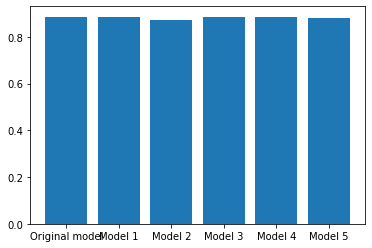

In [120]:
import matplotlib.pyplot as plt

y = [CV_accuracy_model,
     CV_accuracy_model1,
     CV_accuracy_model2,
     CV_accuracy_model3,
     CV_accuracy_model4,
     CV_accuracy_model5]

x = ['Original model',
    'Model 1',
    'Model 2',
    'Model 3',
    'Model 4',
    'Model 5']

plt.bar(x, y)

In [124]:
# Wasn't very clear which one had highest accuracy from the plot

# Checking highest accuracy
max(y)

0.8856999

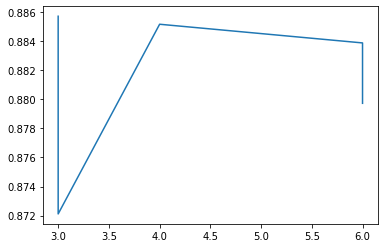

In [74]:
# Plotting the model accuracy against number of layers
x = sorted([len(model.layers), 
     len(model1.layers), 
     len(model2.layers),
     len(model3.layers),
     len(model4.layers),
     len(model5.layers)])

plt.plot(x, y)

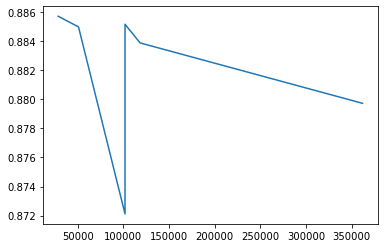

In [75]:
# Plot the model accuracy against number of parameters
x = sorted([model.count_params(),
    model1.count_params(),
    model2.count_params(),
    model3.count_params(),
    model4.count_params(),
    model5.count_params()])

plt.plot(x, y)

#### Conclusion
It appears that all models are performing very similarly. The original model is performing a tiny bit better than the rest, so I'll proceed with this one. There also doesn't seem to be a clear patterns on the relation between number of parameters or number of layers on the cross validation accuracy score of a model.

### Task 4:

Train the selected networks on the entire training data. Then test its performance on the testing data set and summariaze the performance. 

In [125]:
# Fit model on all training data
model.fit(train_images, train_labels, epochs = 10)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 0)

# Print results
print('Accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 456us/sample - loss: 0.4975 - acc: 0.8254
Epoch 2/10
60000/60000 [==============================] - 29s 488us/sample - loss: 0.3795 - acc: 0.8632
Epoch 3/10
60000/60000 [==============================] - 26s 426us/sample - loss: 0.3406 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 23s 381us/sample - loss: 0.3161 - acc: 0.8835
Epoch 5/10
60000/60000 [==============================] - 17s 283us/sample - loss: 0.2971 - acc: 0.8909
Epoch 6/10
60000/60000 [==============================] - 17s 275us/sample - loss: 0.2839 - acc: 0.8951
Epoch 7/10
60000/60000 [==============================] - 18s 307us/sample - loss: 0.2727 - acc: 0.8996
Epoch 8/10
60000/60000 [==============================] - 19s 310us/sample - loss: 0.2629 - acc: 0.9021
Epoch 9/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.2503 - acc: 0.9067
Epoch 10/10
60000/60000 [================

In [126]:
# Check predictions so we can evaluate performance per class
predictions = model.predict_classes(test_images, verbose = 0)

# Check 5 first
predictions[0:5]

array([9, 2, 1, 1, 6])

In [127]:
# Specify class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Check error rate per clothing item
item_error_rate = []
for i in range(10):
    item_index = test_labels == i
    item_predictions = predictions[item_index]
    item_true = test_labels[item_index]
    error_rate_item = 1 - np.mean(item_true == item_predictions)
    item_error_rate.append(error_rate_item)

for i in range(10):
    print('Error rate for', class_names[i], 'is', np.round(item_error_rate[i], 2))

Error rate for T-shirt/top is 0.18
Error rate for Trouser is 0.02
Error rate for Pullover is 0.15
Error rate for Dress is 0.17
Error rate for Coat is 0.29
Error rate for Sandal is 0.04
Error rate for Shirt is 0.27
Error rate for Sneaker is 0.04
Error rate for Bag is 0.03
Error rate for Ankle boot is 0.03


*Comment*: We can see that the model is doing a rather bad job on shirt, which is surprising because it's exactly what the Gaussian classification model was bad at too. On the other hand it is extremely good at classifying trousers, only 2 % are classified as something else.

### Task 5: 
With the models trained, you can use them to make predictions about some images. Below you see a discussion of predictions based on the original model. Please, complement it with an analogous discussion for the best model out of five you have trained in the cross-validation. 

*Comment*: Ok so apparently I rushed ahead :) What we're going to look at next is the class probabilities. These we get if we use predict() instead of predict_class(). They are interesting beause they can be used to see how sure the model is of it's prediction.

In [134]:
prediction_prob = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [135]:
# Looking at first prediction
prediction_prob[0]

array([5.5026788e-07, 1.4786889e-11, 6.9921997e-09, 2.2275459e-10,
       3.7037548e-08, 2.7212743e-03, 4.5314446e-06, 2.1103183e-02,
       1.8585896e-06, 9.7616857e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [136]:
# Highest value 
prediction_prob[0].argmax()

9

*Comment*: The first prediction that the image classified is an ankle boot (index 9).

Graph this to inspect the full set of 10 class predictions.

In [137]:
# Defining a function with which we can inspect images
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color = color)

In [138]:
# Defining function with which we can plot the prob array
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

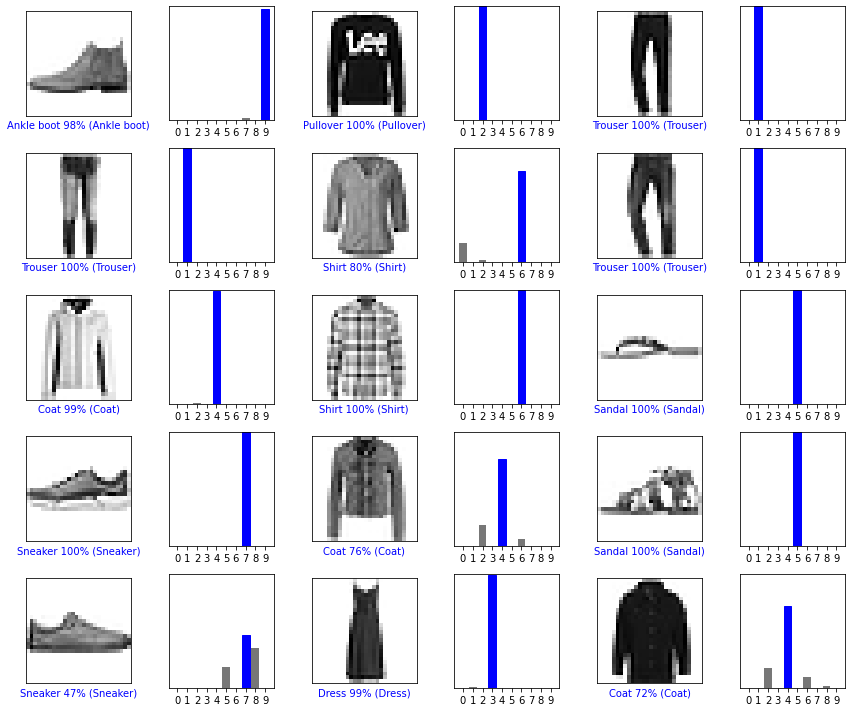

In [139]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction_prob[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction_prob[i], test_labels)
plt.tight_layout()
plt.show()

*Comment*: As we can see above, the classifier is quite good at guessing which item is which. For the shirt on the second row in the middle column, it was quite unsure but still classified it right. This is in line with our other findings - that the shirts are the hardest to classify. Another example like this is the sneaker in the bottom left corner, which was hard to classify despite the fact that the algorithm is generally good at classifying sneakers. An idea for this is that this shoe is turned in the opposite direction than the others, and that the classifier is sensitive to this kind of setting. That actually illustrates the problems with deep learning a little bit - sometimes our algorithms learns different patterns that what we want it to. Maybe it learns that a shoe has a tip to the left, while we as humans knows that a shoe is a shoe no matter what directions it's tip is pointing. 

### Task 6:
Take the reduced data set (16 x 16) from the previous lab and choose the best neural network based on the performance on the full data. Assess the performance of this network on this data set and compare with the MGaussianLikelihood method assessed in the previous lab.  

In [92]:
# Define reshaping function
def dim_reduction(original_matrix, new_dim):
    # Checking how many observations to go through
    nr_observations = len(original_matrix)
    
    # Creating empty matrix of the wanted form
    merged_matrix = np.zeros((nr_observations, new_dim, new_dim))
    
    # Creating variable to use when we loop over the matrices
    multiplier = np.int(28/new_dim)
    
    # Looping over observations and merging
    for nr in range(nr_observations):
        for i in range(len(merged_matrix[0])):
            for j in range(len(merged_matrix[0])):
                merged_matrix[nr, i, j] = np.mean(original_matrix[nr, (multiplier*i):(multiplier*i+multiplier),(multiplier*j):(multiplier*j+multiplier)])
                
    return merged_matrix

In [93]:
train_images_16 = dim_reduction(train_images, 4)
test_images_16 = dim_reduction(test_images, 4)

In [103]:
# Set up first model again

# Set up the model using two hidden layers
model_16 = keras.Sequential([
    keras.layers.Flatten(input_shape = (4, 4)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

# Set up compilation
model_16.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Fit model
model_16.fit(train_images_16, train_labels, epochs = 10)

# Test model
test_loss_16, test_acc_16 = model_16.evaluate(test_images_16, test_labels, verbose = 0)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 407us/sample - loss: 0.9406 - acc: 0.6766
Epoch 2/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.7242 - acc: 0.7269
Epoch 3/10
60000/60000 [==============================] - 28s 469us/sample - loss: 0.6905 - acc: 0.7385
Epoch 4/10
60000/60000 [==============================] - 22s 362us/sample - loss: 0.6646 - acc: 0.7496
Epoch 5/10
60000/60000 [==============================] - 21s 342us/sample - loss: 0.6444 - acc: 0.7562
Epoch 6/10
60000/60000 [==============================] - 21s 349us/sample - loss: 0.6284 - acc: 0.7626
Epoch 7/10
60000/60000 [==============================] - 22s 373us/sample - loss: 0.6163 - acc: 0.7676
Epoch 8/10
60000/60000 [==============================] - 21s 350us/sample - loss: 0.6055 - acc: 0.7703
Epoch 9/10
60000/60000 [==============================] - 17s 285us/sample - loss: 0.5966 - acc: 0.7746
Epoch 10/10
60000/60000 [================

*Comment*: Since this is a little bit tedious to define again and again, I'll make use of the functions I've made above to do it all in once. Will be interesting to see how long it takes...

In [116]:
# Evaluation function

def evaluation(model_nr, train_data, train_labs, test_data, test_labs):
    # Define and compile model
    if model_nr == 1:
        model = define_compile_model1(dim = 4)
    elif model_nr == 2:
        model = define_compile_model2(dim = 4)
    elif model_nr == 3:
        model = define_compile_model3(dim = 4)
    elif model_nr == 4:
        model = define_compile_model4(dim = 4)
    elif model_nr == 5:
        model = define_compile_model5(dim = 4)
    else:
        print('Theres no model with this number.')
    
    # Fit model on all training data
    model.fit(train_data, train_labs, epochs = 10)

    # Evaluate model on test data
    test_loss, test_acc = model.evaluate(test_data, test_labs, verbose = 0)
    
    return test_acc

In [117]:
%%time 

# Evaluating all five models but now on lower dimensions
accuracy_list = []
accuracy_list.append(test_acc_16)

for i in range(5):
    model_number = i + 1
    test_acc = evaluation(model_number, train_images_16, train_labels, test_images_16, test_labels)
    accuracy_list.append(test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 344us/sample - loss: 0.8123 - acc: 0.6978
Epoch 2/10
60000/60000 [==============================] - 19s 315us/sample - loss: 0.6566 - acc: 0.7498
Epoch 3/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.6155 - acc: 0.7641
Epoch 4/10
60000/60000 [==============================] - 19s 313us/sample - loss: 0.5864 - acc: 0.7760
Epoch 5/10
60000/60000 [==============================] - 22s 372us/sample - loss: 0.5658 - acc: 0.7846
Epoch 6/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.5507 - acc: 0.7903
Epoch 7/10
60000/60000 [==============================] - 19s 318us/sample - loss: 0.5358 - acc: 0.7973
Epoch 8/10
60000/60000 [==============================] - 22s 374us/sample - loss: 0.5263 - acc: 0.7987
Epoch 9/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.5164 - acc: 0.8022
Epoch 10/10
60000/60000 [================

In [119]:
for i in range(5):
    print('Accuracy for model nr', i+1, 'was:', accuracy_list[i])

Accuracy for model nr 1 was: 0.7729
Accuracy for model nr 2 was: 0.7998
Accuracy for model nr 3 was: 0.7756
Accuracy for model nr 4 was: 0.7327
Accuracy for model nr 5 was: 0.8051


*Comment*: The Gaussian model we trained on four dimensional data had an error rate of about 30% (at least in my case). The error rate for this neural network classifier is lower, at around 20%, so it clearly performs better. However, we can note that the error rate is higher for the low-dimensional data than it was for the data with higher dimension. This is because of the neural networks ability to deal with and take advantage of high-dimensional data. Furthermore, with our high-dimensional data the original model was best, but with lower dimension model5 was the best instead.

## Grader box: 

In what follows the grader will put the values according the following check list:

* 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)
* 2 Have all commands been experimented with? (0 or 0.5pt)
* 3 Have all experiments been briefly commented? (0 or 0.5pt)
* 4 Have all tasks been attempted? (0, 0.5, or 1pt)
* 5 How many of the tasks have been completed? (0, 0.5, or 1pt)
* 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)
* 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)
* 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt) 


#### 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A
#### Grader's comment (if desired): 
N/A

#### 2 Have all commands been experimented with? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A

#### 3 Have all experiments been briefly commented? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A

#### 4 Have all tasks been attempted? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 5 How many of the tasks have been completed? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt)

#### Grader's comment (if desired): 
N/A

### Overall score

### Score and grader's comment (if desired): 
N/A